<h1>B09705039_劉惟恩_HW09

In [1]:
#載入所需函示庫
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 100
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
import statsmodels

import math
import statistics

<h2>16.117

In [2]:
#讀取資料集
df5 = pd.read_excel('Xr16-05.xlsx')

print('Head of dataset:')
display(df5.head())
print("Tail of dataset:")
display(df5.tail())

Head of dataset:


,Temperature,Beers
0,80,20533
1,68,1439
2,78,13829
3,79,21286
4,87,30985


Tail of dataset:


,Temperature,Beers
5,74,17187
6,86,30240
7,92,37596
8,77,9610
9,84,28742


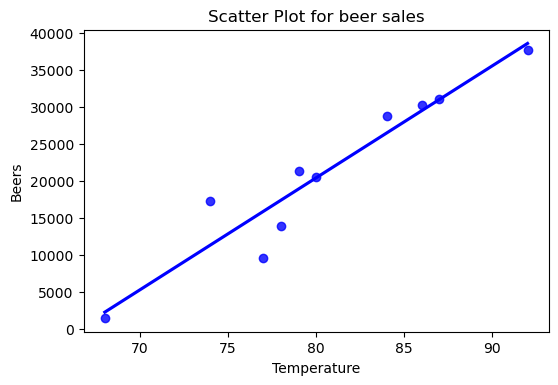

In [3]:
_ = sns.regplot(x='Temperature', y= 'Beers', data = df5, color = 'b', ci = None)
plt.title('Scatter Plot for beer sales')
plt.xlabel('Temperature')
plt.ylabel('Beers')
plt.show()

[ 4.34062573e-02 -3.04365412e-01 -1.06587071e+00  7.23854858e-01
  1.16303943e-03  1.86277417e+00  2.40530572e-01 -3.49866867e-01
 -1.89706674e+00  6.99656244e-01]
mu =  -0.004578458896285631
sigma =  0.9743167243214759


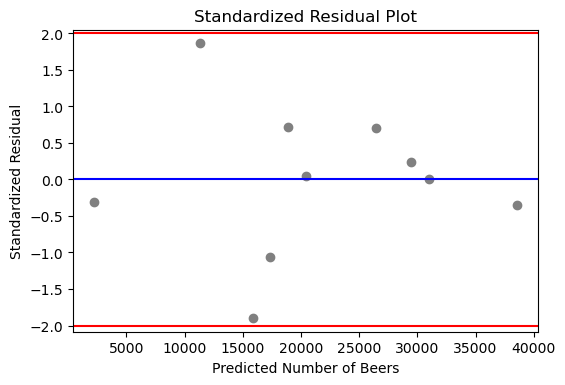

In [4]:
# Fit regression model 
df5_result1 = smf.ols('Beers~ Temperature', data=df5).fit()

# studentized residual
st1, data1, ss3 = sso.summary_table(df5_result1, alpha=0.05)
SD = data1[:, 10]
mu = np.mean(SD)
sigma = np.std(SD)
print(SD)
print('mu = ', mu)
print('sigma = ', sigma)

y_pre = data1[:, 2]
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted Number of Beers')
plt.ylabel('Standardized Residual')
plt.show()

In [5]:
# Outliers
df5_2 = pd.DataFrame(SD,columns = ['SD'])
filter = (df5_2['SD'] < -2) | (df5_2['SD'] > 2)
print("Outliers by SD = \n")
print(df5_2['SD'].loc[filter])

print("")

# Influential Observations
x_data = df5['Temperature'].values
y_data = df5['Beers'].values
cov_mat1 = np.cov(y_data, x_data)
x_data_bar = x_data.mean()
data_nobs = len(x_data)
h_val = 1 / data_nobs + (x_data - x_data_bar) ** 2 / (data_nobs - 1) / cov_mat1[1,1]
print("hi =")
print(h_val, "\n")
df5_h = pd.DataFrame(h_val,columns = ['hi'])
filter = (df5_h['hi'] > 6 / data_nobs )
print("Influential Observations by hi = \n")
print(df5_h['hi'].loc[filter])

Outliers by SD = 

Series([], Name: SD, dtype: float64)

hi =
[0.10057274 0.45796105 0.11431844 0.10515464 0.19679267 0.19679267
 0.16930126 0.40297824 0.12806415 0.12806415] 

Influential Observations by hi = 

Series([], Name: hi, dtype: float64)


No Outliers or Influential Observations.

<h2> 16.127

In [6]:
#讀取資料集
df15 = pd.read_excel('Xr16-15.xlsx')

print('Head of dataset:')
display(df15.head())
print("Tail of dataset:")
display(df15.tail())

Head of dataset:


,Income,Food
0,53,188.24
1,47,304.89
2,59,304.99
3,44,283.99
4,87,316.21


Tail of dataset:


,Income,Food
145,65,220.19
146,72,304.07
147,80,330.50
148,59,257.37
149,81,313.64


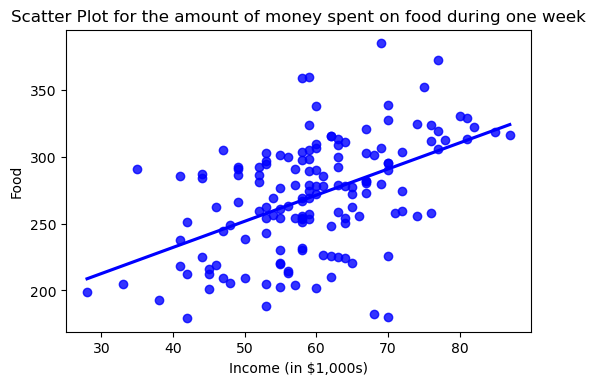

In [7]:
_ = sns.regplot(x='Income', y= 'Food', data = df15, color = 'b', ci = None)
plt.title('Scatter Plot for the amount of money spent on food during one week')
plt.xlabel('Income (in $1,000s)')
plt.ylabel('Food')
plt.show()

In [8]:
# Fit regression model 
df15_result1 = smf.ols('Food~ Income', data=df15).fit()

# Studentized residual
st1, data1, ss3 = sso.summary_table(df15_result1, alpha=0.05)
SD = data1[:, 10]
mu = np.mean(SD)
sigma = np.std(SD)
print(SD)
print('mu = ', mu)
print('sigma = ', sigma)

[-1.88851427  1.60865429  0.96581675  1.20164756 -0.22376755 -0.00646877
  1.10198365 -1.89785981  0.12336996 -0.05030115  0.04115229 -0.30362344
 -0.42489064  0.86282701 -0.71678565 -0.73263189  0.60851042 -1.11102007
  0.40842249  0.68653803 -0.95946391 -0.6719616  -2.86000782 -0.07725211
 -0.50881555 -1.67364405 -0.12429495 -0.03313115 -0.97557091 -0.4466933
  0.03872236  0.68905062 -0.75307868 -0.08130634  0.97560853  1.0951918
  1.11446604 -1.55653223  0.11928221 -0.65292291  0.48003263 -0.28259229
  1.07628375  0.13410854 -0.41603535  0.13856144  0.2538677   0.4797222
 -0.208721    0.98447334 -1.17438223 -0.37358044  0.97817238 -0.01440057
 -1.157373    0.1013357  -0.99550065 -1.15480506  1.4713063   0.18006235
 -0.36380199 -0.67573129  1.31181594 -1.32971748 -0.40448356 -0.56486482
 -0.02133648  1.88527884  0.82429712 -0.95119222  0.13588093  0.02657893
  0.38363719  0.34500861  1.86452658  2.49839713  0.37038431 -1.42615322
  1.00947395 -0.3766109  -0.01966965 -0.85446274 -1.78

1. Normality Test:<br>
Hypothesis:<br>
H0: Errors are normally distributed.<br>
H1: Errors are not normally distributed.<br>

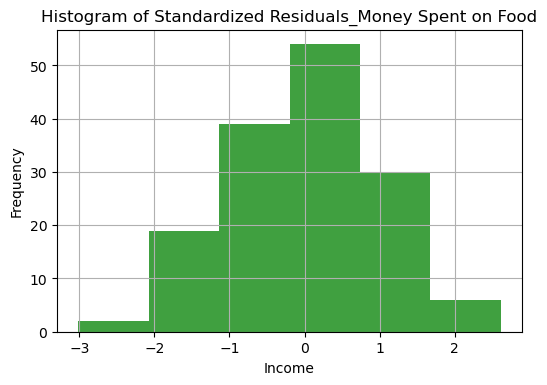

Chi-squared test: statistics = 6.4000, p-value = 0.0937
Critical value = 7.8147 (defree of freedom = 3)
0.09369079040762963
Shapiro Test
Statistics=0.992, p=0.520


/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


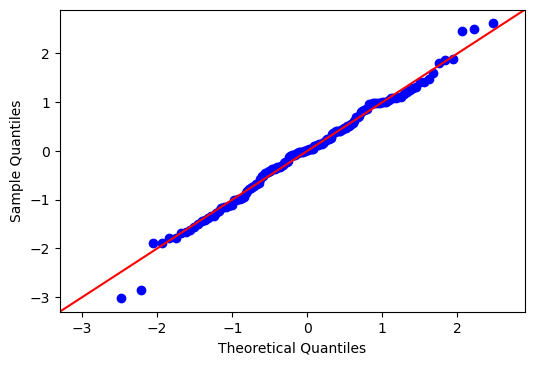

In [9]:
# 1. Normality Test
def Chi_Square_for_Normality(SD, N, a): 
    m = np.mean(SD)
    s = np.std(SD)   
    prob_bins = np.zeros((N + 1))
    z_bins = np.zeros((N + 1))
    z_bins[0] = -4
    z_bins[N] = 4
    for i in range(0, N+1):
        prob_bins[i] = i/N
    for j in range(1, N):
        z_bins[j] = m + stats.norm.isf(1 - prob_bins[j]) * s 
    counts, bins = np.histogram(SD, bins=z_bins)
    nobs = counts.sum()
    prob_e = np.zeros((N))
    for i in range(1, N+1):
        prob_e[i - 1] = prob_bins[i] - prob_bins[i - 1]
    freq_e = nobs * prob_e
    freq_o = counts
    if np.sum(freq_e < 5) > 0:
        print("Rule of five is not met. ")
    else:
        chi_stat, pval = stats.chisquare(freq_o, freq_e) 
        chi_pval = stats.chi2.sf(chi_stat, N - 3)
        print("Chi-squared test: statistics = %0.4f, p-value = %0.4f" % (chi_stat, chi_pval))
    df = N - 3
    crit_value = stats.chi2.ppf(1 - a, df)
    print("Critical value = %0.4f (defree of freedom = %d)" % (crit_value, df))
    return chi_pval

counts, bins, patches = plt.hist(SD, 6, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals_Money Spent on Food')
plt.grid(True)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
plt.show()

fig = sm.qqplot(SD, stats.norm, fit=True, line='45')

chi2_pval = Chi_Square_for_Normality(SD, 6, 0.05) 
print(chi2_pval)
                
print('Shapiro Test')
stat, p = stats.shapiro(SD)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Because p_value = 0.0937 > a =0.05, do not rejected H0. We can assume that errors are normally distributed.

2. Homoscedasticity and Heteroscedasticity:<br>
Hypothesis:<br>
H0: Homoscedasticity<br>
H1: Heteroscedasticity

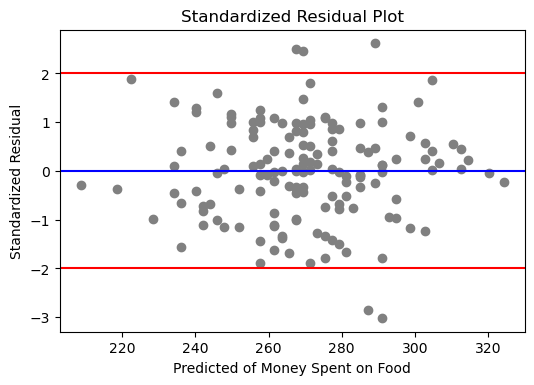

In [10]:
# 2. Homoscedasticity and Heteroscedasticity
y_pre = data1[:, 2]
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted of Money Spent on Food')
plt.ylabel('Standardized Residual')
plt.show()

Do not rejected H0. We can assume that the variation is constant and the mean is around 0.

3. Dependence of the Error Variable:<br>
Hypothesis:<br>
H0 : Randomness exists.<br>
H1 : Randomness does not exist.

In [11]:
def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1     
    # Checking for start of new run 
    for i in range(len(l)): 
        # no. of runs 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
            # print(i, runs)
        # no. of positive values 
        if(l[i]) >= l_median: 
            n1 += 1   
        # no. of negative values 
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median) 

print('p_value for Z-statistic= ', Z_pval)

runs =  77
n1 =  75
n2 =  76
runs_exp =  76.49668874172185
stan_dev =  6.1233179035675915
z =  0.08219583993587927
pval_z =  0.9344909815035417
p_value for Z-statistic=  0.9344909815035417


Because p-value = 0.9344909815035417 > a = 0.05, do not reject H0. There is no evidence to infer that the sample is not random.

All required conditions satisfied.

In [12]:
# Outliers
df15_2 = pd.DataFrame(SD,columns = ['SD'])
filter = (df15_2['SD'] < -2) | (df15_2['SD'] > 2)
print("Outliers by SD = \n")
print(df15_2['SD'].loc[filter])

print("")

# Influential Observations
x_data = df15['Income'].values
y_data = df15['Food'].values
cov_mat1 = np.cov(y_data, x_data)
x_data_bar = x_data.mean()
data_nobs = len(x_data)
h_val = 1 / data_nobs + (x_data - x_data_bar) ** 2 / (data_nobs - 1) / cov_mat1[1,1]
print("hi =")
print(h_val, "\n")
df15_h = pd.DataFrame(h_val,columns = ['hi'])
filter = (df15_h['hi'] > 6 / data_nobs )
print("Influential Observations by hi = \n")
print(df5_h['hi'].loc[filter])

Outliers by SD = 

22    -2.860008
75     2.498397
115   -3.015479
120    2.466531
144    2.615022
Name: SD, dtype: float64

hi =
[0.00906708 0.01565045 0.00667694 0.02051459 0.05096675 0.00734786
 0.00705433 0.00668626 0.01318576 0.04477475 0.00741308 0.00700774
 0.00667694 0.00788832 0.01877673 0.00705433 0.00741308 0.00780445
 0.02466589 0.00987311 0.01588341 0.00788832 0.01095403 0.00837753
 0.00741308 0.00700774 0.01001289 0.01565045 0.0067841  0.0067841
 0.0067841  0.00700774 0.00918822 0.01001289 0.00741308 0.00705433
 0.01299008 0.02433975 0.01318576 0.02433975 0.01201166 0.06416145
 0.00906708 0.00667694 0.02051459 0.00681206 0.00837753 0.01001289
 0.00780445 0.00734786 0.01904696 0.04731864 0.01001289 0.00780445
 0.01183461 0.00987311 0.01565045 0.01426202 0.00667694 0.00668626
 0.01183461 0.01715535 0.01318576 0.00734786 0.00906708 0.01588341
 0.01318576 0.04139687 0.0067841  0.01447635 0.00906708 0.02466589
 0.01095403 0.00681206 0.02466589 0.0067841  0.00700774 0.00741308


Outliers ID: 23, 76, 446, 121, 145<br>
Influential Observations ID: 5, 10

<h2>16.133

In [13]:
#讀取資料集
df1 = pd.read_excel('Xr16-133.xlsx')

print('Head of dataset:')
display(df1.head())
print("Tail of dataset:")
display(df1.tail())

Head of dataset:


/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Yield,Fetilizer
0,223,100
1,321,200
2,158,300
3,187,400
4,331,500


Tail of dataset:


,Yield,Fetilizer
25,366,100
26,376,200
27,323,300
28,421,400
29,448,500


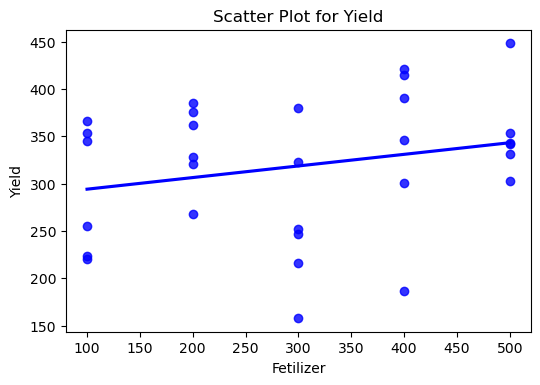

In [14]:
# Step 1
_ = sns.regplot(x='Fetilizer', y= 'Yield', data = df1, color = 'b', ci = None)
plt.title('Scatter Plot for Yield')
plt.xlabel('Fetilizer')
plt.ylabel('Yield')
plt.show()

<h2>(a)

Statistical Model: Sample regression line

In [15]:
#Step 2, 3, 6

# Fit regression model 
df1_result1 = smf.ols('Yield~ Fetilizer', data=df1).fit()
# Inspect the results
print(df1_result1.summary())

b1 = df1_result1.params[1]
b0 = df1_result1.params[0]
print("\nEstimated model: y = %0.4f + %0.4f x" % (b0, b1))

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.772
Date:                Wed, 27 Apr 2022   Prob (F-statistic):              0.194
Time:                        10:07:52   Log-Likelihood:                -169.57
No. Observations:                  30   AIC:                             343.1
Df Residuals:                      28   BIC:                             345.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    281.8000     30.561      9.221      0.0

$b_0$: The intercept is 281.8. Cannot be interpret since there is no data near Fetilizer = 0. <br>
$b_1$: The slope of the line. For each additional Fetilizer, the Yield increases by an average of 0.1227.

In [16]:
# Step 4
# Studentized residual
st1, data1, ss3 = sso.summary_table(df1_result1, alpha=0.05)
SD = data1[:, 10]
mu = np.mean(SD)
sigma = np.std(SD)
print(SD)
print('mu = ', mu)
print('sigma = ', sigma)

[-1.04954635e+00  2.10827155e-01 -2.28856946e+00 -2.06802273e+00
 -1.79190839e-01 -5.76955120e-01  8.00184885e-01 -1.46206244e+00
 -4.29320753e-01 -1.67376059e-02  8.70355506e-01  3.11449207e-01
 -9.49058072e-01  2.17535292e-01 -1.96913010e-03 -1.09385177e+00
  1.13080020e+00 -1.02030868e+00  8.50016758e-01 -5.92708161e-01
  7.52207700e-01 -5.51025520e-01  8.74957442e-01  1.20938123e+00
  1.45715628e-01  1.06234569e+00  1.00142899e+00  6.27005333e-02
  1.29562870e+00  1.54872083e+00]
mu =  0.0021643034818295288
sigma =  0.9951827058796336


1. Normality Test:<br>
Hypothesis:<br>
H0: Errors are normally distributed.<br>
H1: Errors are not normally distributed.<br>

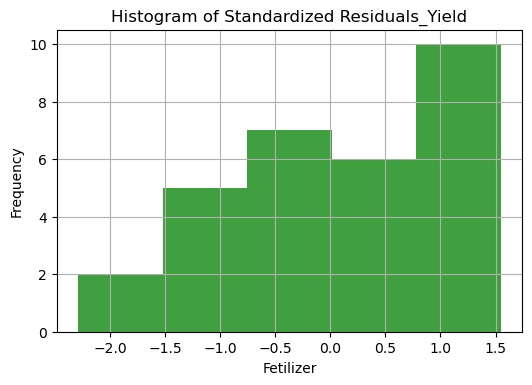

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Chi-squared test: statistics = 4.0000, p-value = 0.1353
Critical value = 5.9915 (defree of freedom = 2)
0.13533528323661242
Shapiro Test
Statistics=0.953, p=0.207


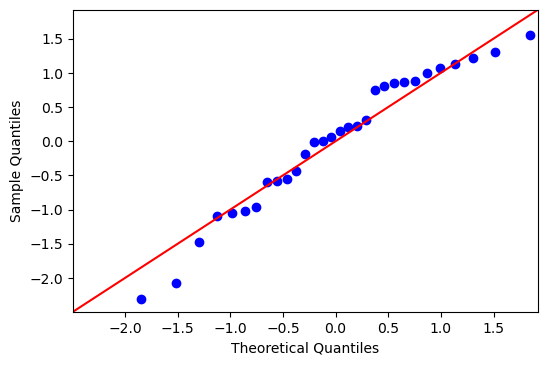

In [17]:
# 1. Normality Test
def Chi_Square_for_Normality(SD, N, a): 
    m = np.mean(SD)
    s = np.std(SD)   
    prob_bins = np.zeros((N + 1))
    z_bins = np.zeros((N + 1))
    z_bins[0] = -4
    z_bins[N] = 4
    for i in range(0, N+1):
        prob_bins[i] = i/N
    for j in range(1, N):
        z_bins[j] = m + stats.norm.isf(1 - prob_bins[j]) * s 
    counts, bins = np.histogram(SD, bins=z_bins)
    nobs = counts.sum()
    prob_e = np.zeros((N))
    for i in range(1, N+1):
        prob_e[i - 1] = prob_bins[i] - prob_bins[i - 1]
    freq_e = nobs * prob_e
    freq_o = counts
    if np.sum(freq_e < 5) > 0:
        print("Rule of five is not met. ")
    else:
        chi_stat, pval = stats.chisquare(freq_o, freq_e) 
        chi_pval = stats.chi2.sf(chi_stat, N - 3)
        print("Chi-squared test: statistics = %0.4f, p-value = %0.4f" % (chi_stat, chi_pval))
    df = N - 3
    crit_value = stats.chi2.ppf(1 - a, df)
    print("Critical value = %0.4f (defree of freedom = %d)" % (crit_value, df))
    return chi_pval

counts, bins, patches = plt.hist(SD, 5, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Fetilizer')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals_Yield')
plt.grid(True)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
plt.show()

fig = sm.qqplot(SD, stats.norm, fit=True, line='45')

chi2_pval = Chi_Square_for_Normality(SD, 5, 0.05) 
print(chi2_pval)
                
print('Shapiro Test')
stat, p = stats.shapiro(SD)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Because p_value = 0.1353 > a =0.05, do not rejected H0. We can assume that errors are normally distributed.

2. Homoscedasticity and Heteroscedasticity:<br>
Hypothesis:<br>
H0: Homoscedasticity<br>
H1: Heteroscedasticity

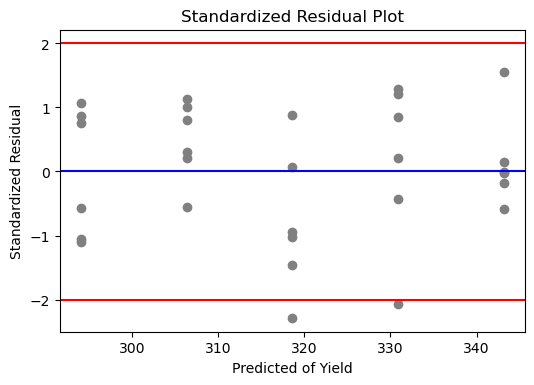

In [18]:
# 2. Homoscedasticity and Heteroscedasticity
y_pre = data1[:, 2]
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted of Yield')
plt.ylabel('Standardized Residual')
plt.show()

Do not rejected H0. We can assume that the variation is constant and the mean is around 0.

3. Dependence of the Error Variable:<br>
Hypothesis:<br>
H0 : Randomness exists.<br>
H1 : Randomness does not exist.

In [19]:
def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1     
    # Checking for start of new run 
    for i in range(len(l)): 
        # no. of runs 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
            # print(i, runs)
        # no. of positive values 
        if(l[i]) >= l_median: 
            n1 += 1   
        # no. of negative values 
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median) 

print('p_value for Z-statistic= ', Z_pval)

runs =  19
n1 =  15
n2 =  16
runs_exp =  16.483870967741936
stan_dev =  2.7341445290860764
z =  0.9202618974568667
pval_z =  0.3574359152813249
p_value for Z-statistic=  0.3574359152813249


Because p-value = 0.3574359152813249 > a = 0.05, do not reject H0. There is no evidence to infer that the sample is not random.

All required conditions satisfied.

In [20]:
# Outliers
df1_2 = pd.DataFrame(SD,columns = ['SD'])
filter = (df1_2['SD'] < -2) | (df1_2['SD'] > 2)
print("Outliers by SD = \n")
print(df1_2['SD'].loc[filter])

print("")

# Influential Observations
x_data = df1['Fetilizer'].values
y_data = df1['Yield'].values
cov_mat1 = np.cov(y_data, x_data)
x_data_bar = x_data.mean()
data_nobs = len(x_data)
h_val = 1 / data_nobs + (x_data - x_data_bar) ** 2 / (data_nobs - 1) / cov_mat1[1,1]
print("hi =")
print(h_val, "\n")
df1_h = pd.DataFrame(h_val,columns = ['hi'])
filter = (df1_h['hi'] > 6 / data_nobs )
print("Influential Observations by hi = \n")
print(df1_h['hi'].loc[filter])

Outliers by SD = 

2   -2.288569
3   -2.068023
Name: SD, dtype: float64

hi =
[0.1        0.05       0.03333333 0.05       0.1        0.1
 0.05       0.03333333 0.05       0.1        0.1        0.05
 0.03333333 0.05       0.1        0.1        0.05       0.03333333
 0.05       0.1        0.1        0.05       0.03333333 0.05
 0.1        0.1        0.05       0.03333333 0.05       0.1       ] 

Influential Observations by hi = 

Series([], Name: hi, dtype: float64)


Outliers ID: 3, 4<br>
No Influential Observations.

<h2>(b)

Significance Test:<br>
Hypothesis Testing about $\beta_1$:<br>
H0:$\beta_1$ = 0 (No linear relationship.)<br>
H1:$\beta_1 \neq$ 0 (Linear relationship.)

This test in conducted in the chart of OLS Regression Results. <br>
According to the chart the t is 1.331, and the p-value is 0.194. <br>
Since the p-value > alpha = 0.05, we  do not reject H0. There is no sufficient evidence at alpha = 5% to infer that there are linear relationship between the two variables.
There isn't a linear relationship between the amount of fertilizer and the crop yield.

<h2>(c)

In [21]:
SSR = df1_result1.ssr
R2 = df1_result1.rsquared
print("SSR = ", SSR)
print("R2 = ", R2)

SSR =  142640.93333333335
R2 =  0.05952603868594697


Coefficient of determination = 0.05952603868594697<br>
Interpretation: About 6% of the variation in Yield is explained by the variation in Fertilizer.  The rest (94%) remains unexplained by this model.

<h2>(d)

In [22]:
s2_e = df1_result1.mse_resid
print('MSE: ', s2_e)
s_e = df1_result1.mse_resid ** 0.5
print('Standard errors: ', s_e)
print("The sample mean of the dependent variable: ", df1['Yield'].mean())

MSE:  5094.319047619048
Standard errors:  71.37449858050877
The sample mean of the dependent variable:  318.6


The standard errors (71.37449858050877) are smaller (but not significant) than the sample mean of the dependent variable (318.6), the model may be okay.

Since the tests in (b), (c) and (d) suggested that there isn't a strong linear relationship between Yield and Fertilizer, the prediction may not be too accurate.

In [23]:
#Step 7
def CI_PI_simple_regression(x, y, x1, a):
    x_new = np.array([1, x1])
    print("make CI and PI predictions at mean of x = ", x1)
    X2 = sm.add_constant(x)
    olsmod = sm.OLS(y, X2)
    result_reg = olsmod.fit()
    y_head = np.dot(result_reg.params, x_new)
    print("y_head = ", y_head)
    (t_minus, t_plus) = stats.t.interval(alpha = (1.0 - a), df = result_reg.df_resid )
    cov_mat1 = np.cov(y, x)
    x_bar = x.mean()
    core1 = (1 / result_reg.nobs + 
         (x1 - x_bar) ** 2 / (result_reg.nobs - 1) / cov_mat1[1,1] ) ** 0.5
    core2 = (1 + 1 / result_reg.nobs + 
         (x1 - x_bar) ** 2 / (result_reg.nobs - 1) / cov_mat1[1,1] ) ** 0.5
    lower_bound = y_head + t_minus * (result_reg.mse_resid ** 0.5) * core1
    upper_bound = y_head + t_plus * (result_reg.mse_resid ** 0.5) * core1
    half_interval = t_plus * (result_reg.mse_resid ** 0.5) * core1
    lower_bound2 = y_head + t_minus * (result_reg.mse_resid ** 0.5) * core2
    upper_bound2 = y_head + t_plus * (result_reg.mse_resid ** 0.5) * core2
    half_interval2 = t_plus * (result_reg.mse_resid ** 0.5) * core2
    print("Confidence interval for mean: [%0.4f, %0.4f]" % (lower_bound, upper_bound))
    print("    or %0.4f  +- %0.4f" % (y_head, half_interval))
    print("Prediction interval = [%0.4f, %0.4f] " % (lower_bound2, upper_bound2))
    print("    or %0.4f  +- %0.4f" % (y_head, half_interval2))
    CI_PI = np.array([lower_bound, upper_bound, lower_bound2, upper_bound2])
    return CI_PI

CI_PI_result = CI_PI_simple_regression(df1['Fetilizer'], df1['Yield'], 300, 0.05)
print(CI_PI_result)

make CI and PI predictions at mean of x =  300
y_head =  318.6000000000002
Confidence interval for mean: [291.9069, 345.2931]
    or 318.6000  +- 26.6931
Prediction interval = [169.9792, 467.2208] 
    or 318.6000  +- 148.6208
[291.90691778 345.29308222 169.97920806 467.22079194]


/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


There is 95% chance that the interval [291.9069, 345.2931] will cover the real number of Yeild when the Fertilizer is 300.

<h2>17.1

In [24]:
#讀取資料集
df1 = pd.read_excel('Xr17-01.xlsx')

print('Head of dataset:')
display(df1.head())
print("Tail of dataset:")
display(df1.tail())

Head of dataset:


,Price,Lot size,Trees,Distance
0,105.4,41.2,24,42
1,91.2,44.8,5,71
2,183.3,21.3,72,43
3,93.8,43.9,58,14
4,207.5,57.7,52,12


Tail of dataset:


,Price,Lot size,Trees,Distance
55,27.9,40.0,52,84
56,103.5,46.6,26,70
57,107.0,23.2,11,83
58,51.6,46.4,53,44
59,133.4,32.1,55,98


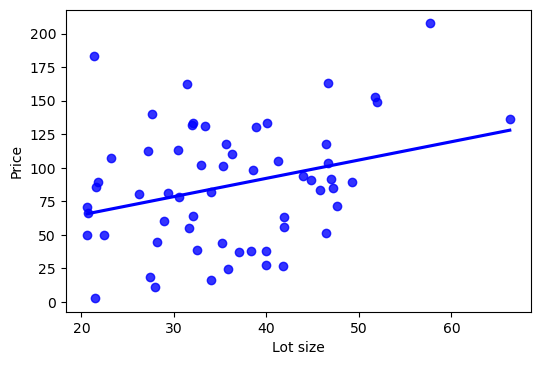

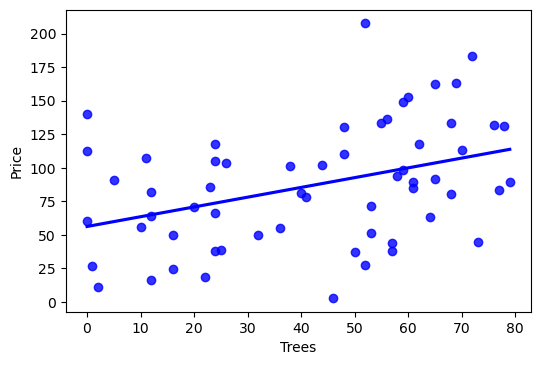

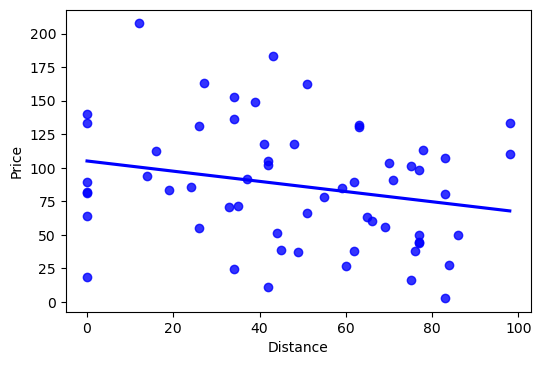

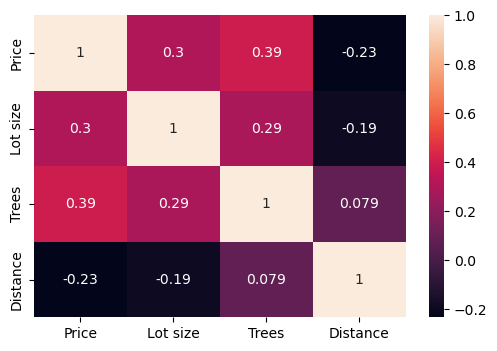

In [25]:
#Scatter Plots
y_var = df1['Price'].values
xnames = ['Lot size', 'Trees', 'Distance']
for aname in xnames:
    x_var = df1[aname].values
    _ = sns.regplot(x = x_var, y = y_var, data = df1, color = 'b', ci = None)
    #_ = plt.plot(x, y, 'o', color = 'b')
    plt.xlabel(aname)
    plt.ylabel('Price')
    plt.show()
    
# Coefficient of Correlation
df1_2 = df1[['Price', 'Lot size', 'Trees', 'Distance']]
corr1 = df1_2.corr()
corr1
_ = sns.heatmap(corr1, annot=True)

<h2>(a)

In [26]:
y_data = df1['Price']
X_data_ar = np.array([df1['Lot size'], df1['Trees'], df1['Distance']])
X_data_T = X_data_ar.T
X_data = pd.DataFrame(X_data_T,columns = ['Lot size', 'Trees', 'Distance'])
X_data2 = sm.add_constant(X_data)
olsmod = sm.OLS(y_data, X_data2)
result_reg = olsmod.fit()
print(result_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     5.975
Date:                Wed, 27 Apr 2022   Prob (F-statistic):            0.00132
Time:                        10:07:53   Log-Likelihood:                -304.76
No. Observations:                  60   AIC:                             617.5
Df Residuals:                      56   BIC:                             625.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.3912     23.517      2.185      0.0

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Regression equation:<br>
$Price = 0.6999 Lot size + 0.6788 Trees - 0.3784 Distance + 51.3912$<br>

<h2>(b)

In [27]:
# standard error of estimate
print("standard error = ", result_reg.mse_resid ** 0.5)

print("mean of y", df1['Price'].mean())
print("std of y", df1['Price'].std())

standard error =  40.24352944532851
mean of y 86.7133333333333
std of y 45.04687752931654


The standard error of estimate is 40.24352944532851.<br>
It seems that se is small compared to mean of y. We can conclude the model fits the data well.

<h2>(c)

According to the OLS Regression Results:<br>
The coefficient of determination is 0.242.<br>
24.2% of the variation in price is explained by this regression line of the three independent variables and 75.8% remains unexplained.

<h2>(d)

According to the OLS Regression Results:<br>
The coefficient of determination, adjusted for degrees of freedom is 0.202.<br>
This value differ from the coefficient of determination, because it takes into account of the sample size and number of independent variables.<br>
The adjusted coefficient of determination is 0.202 is close to 0.242 (<= 0.06) even though 3 independent variables are included in the model,
indicating that the model has no problem of over-fitting.

<h2>(e)

Hypothesis:<br>
H0: b1 = b2 = … = bk = 0<br>
H1: At least one bi is not equal to zero.

In [28]:
# ANOVA test
f_res = result_reg.fvalue
print("F value = ", f_res)
MSE = result_reg.mse_resid
df_model = result_reg.df_model
df_error = result_reg.df_resid
MSR = f_res * MSE
SSR = MSR * df_model
print("SSR = ", SSR, "df = ", df_model, "MSR = ", MSR)
print("SSE = ", MSE * df_error, "df = ", df_error, "MSE = ", MSE)
print("F = ", MSR / MSE)
A = np.identity(len(result_reg.params))
A = A[1:,:]
print("F test = ", result_reg.f_test(A))

F value =  5.974883085016509
SSR =  29029.71624918004 df =  3.0 MSR =  9676.572083060013
SSE =  90694.3330841533 df =  56.0 MSE =  1619.5416622170233
F =  5.974883085016509
F test =  <F test: F=array([[5.97488309]]), p=0.001315371250554977, df_denom=56, df_num=3>


The p-value = 0.001315371250554977 < 0.05, the null hypothesis is rejected. Thus, at least one independent variable is related to y. This regression model is valid.

<h2>(f)

According to the OLS Regression Results:

51.3912, is the intercept, the value of y when all the variables take the value zero.
Since the data range of all the independent variables do not cover the value zero, do not interpret the intercept.

0.6999, for each additional Lot size, the price y increases on the average by 0.6999.

0.6788, for each additional Trees, the price y increases on the average by 0.6788.

-0.3784 , for each additional Distance, the price y decreases on the average by 0.3784.

<h2>(g)

Hypothesis:<br>
H0:  bi = 0<br>
H1:  bi $\neq$ 0

According to the OLS Regression Results:<br>
Lot size, distance do not reject H0, Trees reject H0. Thus only Trees is linearly related to the price of the lot in this model.

<h2>(h)

In [29]:
# Predict and Estimate
def CI_PI_regression(xdata, yval, x1, a):
    print("make CI and PI prediction at mean of x = ", x1)
    X_data_T = xdata.T
    X_data2 = sm.add_constant(X_data_T)
    olsmod = sm.OLS(yval, X_data2)
    result_reg = olsmod.fit()
    y_head = np.dot(result_reg.params, x1)
    print("y_head = ", y_head)
    (t_minus, t_plus) = stats.t.interval(alpha = (1.0 - a), df = result_reg.df_resid )
    core1 = (result_reg.mse_resid * np.matmul(x1, np.linalg.solve(np.matmul(X_data2.T, X_data2), x1))) ** 0.5
    lower_bound = y_head +  t_minus * core1
    upper_bound = y_head +  t_plus * core1
    print("Confidence interval of mean = [%0.4f, %0.4f] " % (lower_bound, upper_bound))
    core2 = (result_reg.mse_resid * (1 + np.matmul(x1, np.linalg.solve(np.matmul(X_data2.T, X_data2), x1)))) ** 0.5
    lower_bound2 = y_head +  t_minus * core2
    upper_bound2 = y_head +  t_plus * core2
    print("Prediction interval = [%0.4f, %0.4f] " % (lower_bound2, upper_bound2))
    CI_PI = np.array([lower_bound, upper_bound, lower_bound2, upper_bound2])
    return CI_PI

xg = np.array([1, 40, 50, 25])
CI_PI_result = CI_PI_regression(X_data_ar, y_data, xg, 0.1)
print(CI_PI_result)

make CI and PI prediction at mean of x =  [ 1 40 50 25]
y_head =  103.86903065890239
Confidence interval of mean = [91.8599, 115.8782] 
Prediction interval = [35.4979, 172.2402] 
[ 91.85990931 115.87815201  35.49789014 172.24017117]


It is predicted, with 90% confidence that the interval [35.4979, 172.2402], covers the selling price.

<h2>(i)

In [30]:
xg = np.array([1, 50, 10, 75])
CI_PI_result = CI_PI_regression(X_data_ar, y_data, xg, 0.1)
print(CI_PI_result)

make CI and PI prediction at mean of x =  [ 1 50 10 75]
y_head =  64.7975106804855
Confidence interval of mean = [39.2909, 90.3041] 
Prediction interval = [-7.1815, 136.7765] 
[ 39.29088536  90.304136    -7.18152651 136.77654787]


It is estimated, with 90% confidence that the interval [39.2909, 90.3041], covers the selling price.

<h2> 17.9

In [31]:
#讀取資料集
df1 = pd.read_excel('Xr17-09.xlsx')

print('Head of dataset:')
display(df1.head())
print("Tail of dataset:")
display(df1.tail())

Head of dataset:


/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Test Score,Math Degree,Age,Income
0,73.9,77,52,44.4
1,59.4,48,32,49.0
2,64.6,33,50,52.6
3,59.8,25,43,39.6
4,58.8,25,40,40.7


Tail of dataset:


,Test Score,Math Degree,Age,Income
35,71.7,57,59,55.1
36,68.8,41,40,33.7
37,45.0,27,40,19.8
38,61.9,37,44,48.2
39,56.0,36,56,55.9


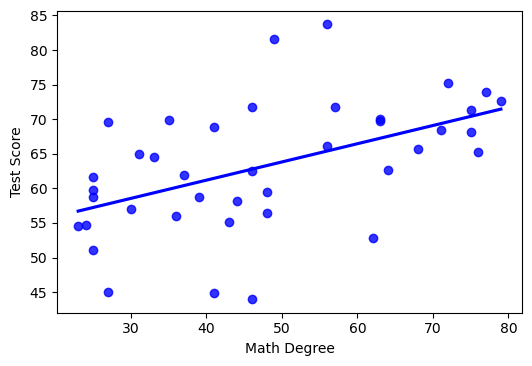

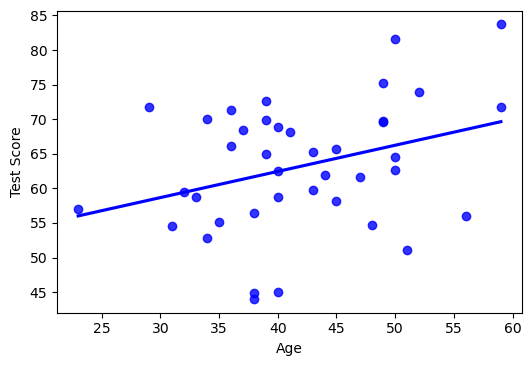

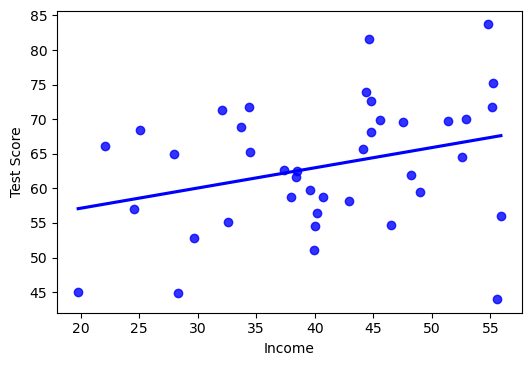

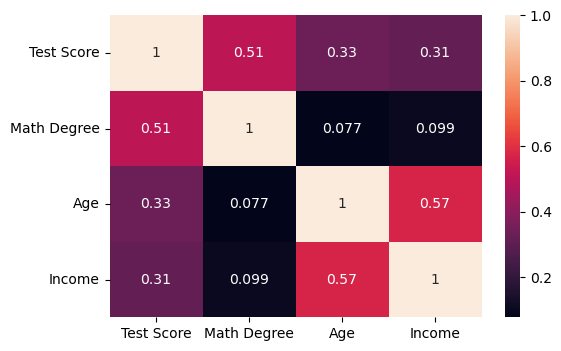

In [32]:
#Scatter Plots
y_var = df1['Test Score'].values
xnames = ['Math Degree', 'Age', 'Income']
for aname in xnames:
    x_var = df1[aname].values
    _ = sns.regplot(x = x_var, y = y_var, data = df1, color = 'b', ci = None)
    #_ = plt.plot(x, y, 'o', color = 'b')
    plt.xlabel(aname)
    plt.ylabel('Test Score')
    plt.show()
    
# Coefficient of Correlation
df1_2 = df1[['Test Score', 'Math Degree', 'Age', 'Income']]
corr1 = df1_2.corr()
corr1
_ = sns.heatmap(corr1, annot=True)

<h2>(a)

In [33]:
y_data = df1['Test Score']
X_data_ar = np.array([df1['Math Degree'], df1['Age'], df1['Income']])
X_data_T = X_data_ar.T
X_data = pd.DataFrame(X_data_T,columns = ['Math Degree', 'Age', 'Income'])
X_data2 = sm.add_constant(X_data)
olsmod = sm.OLS(y_data, X_data2)
result_reg = olsmod.fit()
print(result_reg.summary())

                            OLS Regression Results                            
Dep. Variable:             Test Score   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     6.663
Date:                Wed, 27 Apr 2022   Prob (F-statistic):            0.00108
Time:                        10:07:53   Log-Likelihood:                -136.43
No. Observations:                  40   AIC:                             280.9
Df Residuals:                      36   BIC:                             287.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          35.6776      7.279      4.902      

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Regression equation:<br>
$Test Score = 0.2475 Math Degree + 0.2448 Age + 0.1333 Income + 35.6776$<br>

<h2>(b)

Hypothesis:<br>
H0: b1 = b2 = … = bk = 0<br>
H1: At least one bi is not equal to zero.

In [34]:
# ANOVA test
f_res = result_reg.fvalue
print("F value = ", f_res)
MSE = result_reg.mse_resid
df_model = result_reg.df_model
df_error = result_reg.df_resid
MSR = f_res * MSE
SSR = MSR * df_model
print("SSR = ", SSR, "df = ", df_model, "MSR = ", MSR)
print("SSE = ", MSE * df_error, "df = ", df_error, "MSE = ", MSE)
print("F = ", MSR / MSE)
A = np.identity(len(result_reg.params))
A = A[1:,:]
print("F test = ", result_reg.f_test(A))

F value =  6.663125157435004
SSR =  1192.7321051568083 df =  3.0 MSR =  397.57736838560277
SSE =  2148.0588948431914 df =  36.0 MSE =  59.66830263453309
F =  6.663125157435004
F test =  <F test: F=array([[6.66312516]]), p=0.0010769247208052384, df_denom=36, df_num=3>


The p-value = 0.0010769247208052384 < 0.05, the null hypothesis is rejected. Thus, at least one independent variable is related to y. This regression model is valid.

<h2>(c)

Interpret:
    
According to the OLS Regression Results:

35.6776, is the intercept, the value of y when all the variables take the value zero.
Since the data range of all the independent variables do not cover the value zero, do not interpret the intercept.

0.2475, for each additional Math Degree, the Test Score y increases on the average by 0.2475.

0.2448, for each additional Age, the Test Score y increases on the average by 0.2448.

0.1333 , for each additional Income, the Test Score y increases on the average by 0.1333.

Test:

Hypothesis:<br>
H0:  bi = 0<br>
H1:  bi $\neq$ 0

According to the OLS Regression Results:<br>
Age, Income do not reject H0, Math Degree reject H0. Thus, only Math Degree is linearly related to the Test Score in this model.

<h2>(d)

In [35]:
xg = np.array([1, 50, 43, 48.3])
CI_PI_result = CI_PI_regression(X_data_ar, y_data, xg, 0.05)
print(CI_PI_result)

make CI and PI prediction at mean of x =  [ 1.  50.  43.  48.3]
y_head =  65.01764418592718
Confidence interval of mean = [61.7531, 68.2822] 
Prediction interval = [49.0151, 81.0202] 
[61.75312919 68.28215918 49.01506162 81.02022675]


It is predicted, with 95% confidence that the interval [49.0151, 81.0202], covers the Test Score.

<h2>17.15

In [36]:
#讀取資料集
df1 = pd.read_excel('Xr17-15.xlsx')

#df1.loc[df1["DEFINITE"] > 1, "DEFINITE"] = 0

print('Head of dataset:')
display(df1.head())
print("Tail of dataset:")
display(df1.tail())

Head of dataset:


,DEFINITE,AGE,EDUC,INCOME
0,10,34,13,127500
1,10,58,12,16000
2,10,39,16,32500
3,5,49,12,23500
4,10,72,16,82500


Tail of dataset:


,DEFINITE,AGE,EDUC,INCOME
1657,6,33,12,27500
1658,2,28,12,8750
1659,8,39,13,42500
1660,8,64,12,175000
1661,1,34,10,1500


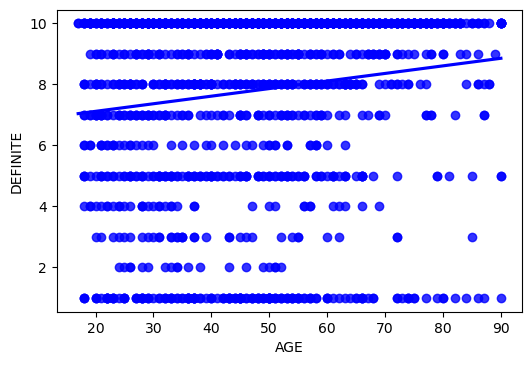

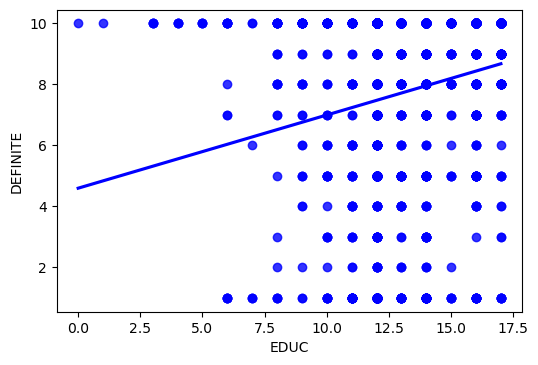

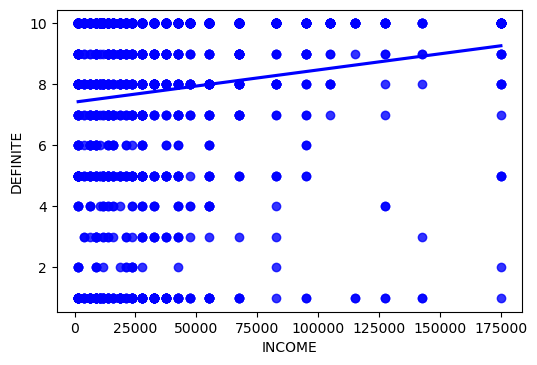

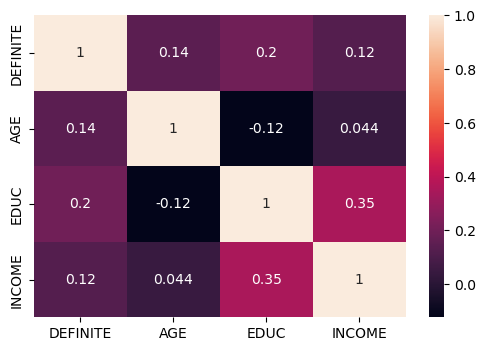

In [37]:
#Scatter Plots
y_var = df1['DEFINITE'].values
xnames = ['AGE', 'EDUC', 'INCOME']
for aname in xnames:
    x_var = df1[aname].values
    _ = sns.regplot(x = x_var, y = y_var, data = df1, color = 'b', ci = None)
    #_ = plt.plot(x, y, 'o', color = 'b')
    plt.xlabel(aname)
    plt.ylabel('DEFINITE')
    plt.show()
    
# Coefficient of Correlation
df1_2 = df1[['DEFINITE', 'AGE', 'EDUC', 'INCOME']]
corr1 = df1_2.corr()
corr1
_ = sns.heatmap(corr1, annot=True)

<h2>(a)

In [38]:
y_data = df1['DEFINITE']
X_data_ar = np.array([df1['AGE'], df1['EDUC'], df1['INCOME']])
X_data_T = X_data_ar.T
X_data = pd.DataFrame(X_data_T,columns = ['AGE', 'EDUC', 'INCOME'])
X_data2 = sm.add_constant(X_data)
olsmod = sm.OLS(y_data, X_data2)
result_reg = olsmod.fit()
print(result_reg.summary())

                            OLS Regression Results                            
Dep. Variable:               DEFINITE   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     41.92
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           4.15e-26
Time:                        10:07:54   Log-Likelihood:                -4116.4
No. Observations:                1662   AIC:                             8241.
Df Residuals:                    1658   BIC:                             8263.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0230      0.461      6.553      0.0

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Regression equation:<br>
$DEFINITE = 0.0289 AGE + 0.2461 EDUC + 3.745e-06 INCOME + 3.0230$<br>

<h2>(b)

Hypothesis:<br>
H0: b1 = b2 = … = bk = 0<br>
H1: At least one bi is not equal to zero.

In [39]:
# ANOVA test
f_res = result_reg.fvalue
print("F value = ", f_res)
MSE = result_reg.mse_resid
df_model = result_reg.df_model
df_error = result_reg.df_resid
MSR = f_res * MSE
SSR = MSR * df_model
print("SSR = ", SSR, "df = ", df_model, "MSR = ", MSR)
print("SSE = ", MSE * df_error, "df = ", df_error, "MSE = ", MSE)
print("F = ", MSR / MSE)
A = np.identity(len(result_reg.params))
A = A[1:,:]
print("F test = ", result_reg.f_test(A))

F value =  41.9182008328677
SSR =  1045.711525713832 df =  3.0 MSR =  348.57050857127734
SSE =  13787.087511590622 df =  1658.0 MSE =  8.315493070923173
F =  41.9182008328677
F test =  <F test: F=array([[41.91820083]]), p=4.1514619156506137e-26, df_denom=1.66e+03, df_num=3>


The p-value = 4.1514619156506137e-26 < 0.05, the null hypothesis is rejected. Thus, at least one independent variable is related to y. This regression model is valid.

<h2>(c)

According to the OLS Regression Results:<br>
Income do not reject H0, others reject H0. Thus, only Income is not linearly related to the DEFINITE in this model.